# MNIST INFERENCE NOTEBOOK

Mnist is a classic dataset composed of handwritten digits.
The next cells will help visualize those.

In [1]:
# import all mandatory libraries
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import torch 
import torchvision
import numpy as np 
import matplotlib.pyplot as plt 
from torchvision.transforms import ToTensor


/Users/valentinbretez/miniforge3/envs/cnn_lab/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## IMAGE

In [2]:
# load the dataset 
datas = torchvision.datasets.MNIST("../data/", train=False, download=False, transform=ToTensor())
img, _ = datas[0]
print("image size = ", img.size())

possible_labels = []
for i in range(len(datas)):
    _, label = datas[i]
    if not label in possible_labels:
        possible_labels.append(label)
print("possible labels : ", possible_labels.sort())


image size =  torch.Size([1, 28, 28])
possible labels :  None


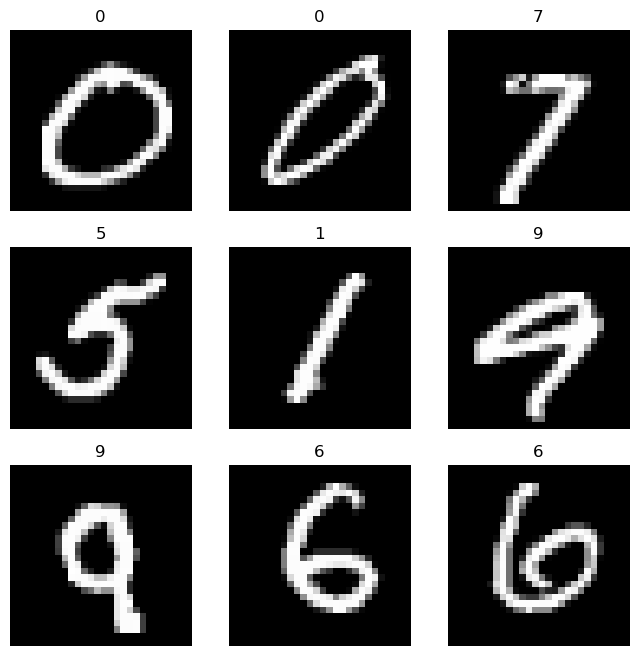

In [3]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(datas), size=(1,)).item()
    img, label = datas[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()



## Network 
All tested networks will be displayed here 

### LeNet5
Load the model

In [4]:
from src.model.LeNet5 import LeNet5
class_number = 10

model = LeNet5(class_number)


Load the weights of the training

In [5]:
lenet_mnist_001_path = "../model/lenet_mnist_001"
model.load_state_dict(torch.load(lenet_mnist_001_path))

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())


Model's state_dict:
encoder.0.blockCNN.0.weight 	 torch.Size([6, 1, 5, 5])
encoder.0.blockCNN.0.bias 	 torch.Size([6])
encoder.1.blockCNN.0.weight 	 torch.Size([16, 6, 5, 5])
encoder.1.blockCNN.0.bias 	 torch.Size([16])
encoder.2.weight 	 torch.Size([120, 16, 5, 5])
encoder.2.bias 	 torch.Size([120])
decoder.0.weight 	 torch.Size([84, 120])
decoder.0.bias 	 torch.Size([84])
decoder.2.weight 	 torch.Size([10, 84])
decoder.2.bias 	 torch.Size([10])


Perform inference

In [46]:
model.eval()
img, _ = datas[0]
img = torchvision.transforms.functional.resize(img, (32,32))
img = torch.unsqueeze(img,0)
logits, prob = model(img)
print("prediction logits : ",prob)
print("prediction probabitlity : " ,prob)
print("Final prediction :", torch.argmax(prob))

prediction logits :  tensor([[0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.4509, 0.0610,
         0.0610]], grad_fn=<SoftmaxBackward0>)
prediction probabitlity :  tensor([[0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.4509, 0.0610,
         0.0610]], grad_fn=<SoftmaxBackward0>)
Final prediction : tensor(7)


Visualize multiple results 

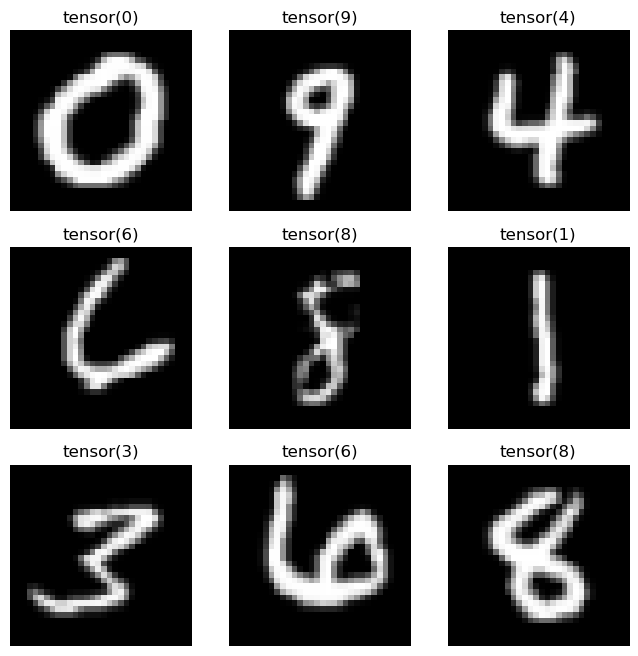

In [47]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(datas), size=(1,)).item()
    img, _ = datas[sample_idx]
    img = torchvision.transforms.functional.resize(img, (32,32))
    final_img = torch.unsqueeze(img,0)
    logits, prob = model(final_img)
    figure.add_subplot(rows, cols, i)
    plt.title(torch.argmax(prob))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()